In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
#style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize']=20,12
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium

In [3]:
statewise=pd.read_csv('https://api.covid19india.org/csv/latest/state_wise.csv')
statewise_daily=pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')

In [4]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
statewise

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,3488059,2667594,62919,756965,29/08/2020 19:05:15,581,TT,26826,20056,205,NaN
1,Maharashtra,747995,543170,23775,180718,28/08/2020 20:29:20,332,MH,0,0,0,332 cases are marked as non-covid deaths in MH...
2,Tamil Nadu,409238,349682,7050,52506,28/08/2020 20:30:22,0,TN,0,0,0,[July 22]: 444 backdated deceased entries adde...
3,Andhra Pradesh,414164,312687,3796,97681,29/08/2020 18:59:20,0,AP,10548,8976,82,Total includes patients from other states and ...
4,Karnataka,318752,227018,5368,86347,28/08/2020 19:56:19,19,KA,0,0,0,NaN
5,Delhi,169412,151473,4389,13550,28/08/2020 19:13:19,0,DL,0,0,0,[July 14]: Value for the total tests conducted...
6,Uttar Pradesh,219457,162741,3356,53360,29/08/2020 16:43:15,0,UP,5633,4862,62,NaN
7,West Bengal,153754,124332,3073,26349,28/08/2020 20:29:25,0,WB,0,0,0,NaN
8,Bihar,132935,115074,679,17181,29/08/2020 16:58:17,1,BR,2087,2629,5,NaN
9,Telangana,120166,89350,808,30008,29/08/2020 10:18:18,0,TG,2751,1675,9,[July 27]\nTelangana bulletin for the previous...


In [6]:
statewise_daily

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
5,15-Mar-20,Deceased,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,16-Mar-20,Confirmed,15,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
7,16-Mar-20,Recovered,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,16-Mar-20,Deceased,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,17-Mar-20,Confirmed,11,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0


In [7]:
statewise.columns

Index(['State', 'Confirmed', 'Recovered', 'Deaths', 'Active',
       'Last_Updated_Time', 'Migrated_Other', 'State_code', 'Delta_Confirmed',
       'Delta_Recovered', 'Delta_Deaths', 'State_Notes'],
      dtype='object')

In [8]:
statewise_daily.columns

Index(['Date', 'Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN',
       'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD',
       'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN',
       'TG', 'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')

In [9]:
statewise.shape

(38, 12)

In [10]:
statewise_daily.shape

(504, 41)

In [11]:
statewise = statewise.iloc[1:]
statewise

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
1,Maharashtra,747995,543170,23775,180718,28/08/2020 20:29:20,332,MH,0,0,0,332 cases are marked as non-covid deaths in MH...
2,Tamil Nadu,409238,349682,7050,52506,28/08/2020 20:30:22,0,TN,0,0,0,[July 22]: 444 backdated deceased entries adde...
3,Andhra Pradesh,414164,312687,3796,97681,29/08/2020 18:59:20,0,AP,10548,8976,82,Total includes patients from other states and ...
4,Karnataka,318752,227018,5368,86347,28/08/2020 19:56:19,19,KA,0,0,0,NaN
5,Delhi,169412,151473,4389,13550,28/08/2020 19:13:19,0,DL,0,0,0,[July 14]: Value for the total tests conducted...
6,Uttar Pradesh,219457,162741,3356,53360,29/08/2020 16:43:15,0,UP,5633,4862,62,NaN
7,West Bengal,153754,124332,3073,26349,28/08/2020 20:29:25,0,WB,0,0,0,NaN
8,Bihar,132935,115074,679,17181,29/08/2020 16:58:17,1,BR,2087,2629,5,NaN
9,Telangana,120166,89350,808,30008,29/08/2020 10:18:18,0,TG,2751,1675,9,[July 27]\nTelangana bulletin for the previous...
10,Gujarat,92601,74651,2976,14974,28/08/2020 20:30:25,0,GJ,0,0,0,NaN


In [12]:

Totalcases = statewise['Confirmed'].sum()
totalrecovered=statewise['Recovered'].sum()
totaldeaths= statewise['Deaths'].sum()
totalactive=statewise['Active'].sum()
print('Total Confirmed Cases In INDIA Is',Totalcases)
print('Total Recovered Cases In INDIA Is',totalrecovered)
print('Total Deaths Cases In INDIA Is',totaldeaths)
print('Total Active Cases In INDIA Is',totalactive)

Total Confirmed Cases In INDIA Is 3488059
Total Recovered Cases In INDIA Is 2667594
Total Deaths Cases In INDIA Is 62919
Total Active Cases In INDIA Is 756965


In [13]:
statewise.drop(['Last_Updated_Time','Migrated_Other','State_code','Delta_Confirmed','Delta_Recovered','Delta_Deaths','State_Notes'],inplace=True,axis=1)

In [14]:
statewise

,State,Confirmed,Recovered,Deaths,Active
1,Maharashtra,747995,543170,23775,180718
2,Tamil Nadu,409238,349682,7050,52506
3,Andhra Pradesh,414164,312687,3796,97681
4,Karnataka,318752,227018,5368,86347
5,Delhi,169412,151473,4389,13550
6,Uttar Pradesh,219457,162741,3356,53360
7,West Bengal,153754,124332,3073,26349
8,Bihar,132935,115074,679,17181
9,Telangana,120166,89350,808,30008
10,Gujarat,92601,74651,2976,14974


In [15]:
pd.DataFrame(statewise)

,State,Confirmed,Recovered,Deaths,Active
1,Maharashtra,747995,543170,23775,180718
2,Tamil Nadu,409238,349682,7050,52506
3,Andhra Pradesh,414164,312687,3796,97681
4,Karnataka,318752,227018,5368,86347
5,Delhi,169412,151473,4389,13550
6,Uttar Pradesh,219457,162741,3356,53360
7,West Bengal,153754,124332,3073,26349
8,Bihar,132935,115074,679,17181
9,Telangana,120166,89350,808,30008
10,Gujarat,92601,74651,2976,14974


In [16]:
statewise.style.background_gradient(cmap='Reds')

,State,Confirmed,Recovered,Deaths,Active
1,Maharashtra,747995,543170,23775,180718
2,Tamil Nadu,409238,349682,7050,52506
3,Andhra Pradesh,414164,312687,3796,97681
4,Karnataka,318752,227018,5368,86347
5,Delhi,169412,151473,4389,13550
6,Uttar Pradesh,219457,162741,3356,53360
7,West Bengal,153754,124332,3073,26349
8,Bihar,132935,115074,679,17181
9,Telangana,120166,89350,808,30008
10,Gujarat,92601,74651,2976,14974


In [17]:
statewise_daily_confirmed = statewise_daily[statewise_daily.Status=='Confirmed']
statewise_daily_confirmed

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
6,16-Mar-20,Confirmed,15,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,17-Mar-20,Confirmed,11,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
12,18-Mar-20,Confirmed,37,0,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
15,19-Mar-20,Confirmed,27,0,2,0,0,0,1,1,...,0,2,0,1,3,0,3,1,0,0
18,20-Mar-20,Confirmed,58,0,0,0,0,0,4,0,...,1,8,0,0,3,0,4,0,1,0
21,21-Mar-20,Confirmed,78,0,2,0,0,0,0,0,...,10,7,0,3,2,0,4,0,2,0
24,22-Mar-20,Confirmed,67,0,1,0,0,2,1,0,...,8,4,0,3,6,0,2,0,3,0
27,23-Mar-20,Confirmed,102,0,1,0,0,1,1,0,...,2,4,0,3,6,0,2,1,0,0


In [18]:
statewise_daily_recovered = statewise_daily[statewise_daily.Status=='Recovered']
statewise_daily_recovered

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
7,16-Mar-20,Recovered,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,17-Mar-20,Recovered,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13,18-Mar-20,Recovered,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,19-Mar-20,Recovered,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
19,20-Mar-20,Recovered,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,21-Mar-20,Recovered,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,22-Mar-20,Recovered,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,23-Mar-20,Recovered,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
statewise_daily_deceased = statewise_daily[statewise_daily.Status == 'Deceased']
statewise_daily_deceased

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15-Mar-20,Deceased,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,16-Mar-20,Deceased,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,17-Mar-20,Deceased,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,18-Mar-20,Deceased,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,19-Mar-20,Deceased,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20,20-Mar-20,Deceased,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,21-Mar-20,Deceased,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,22-Mar-20,Deceased,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29,23-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Graphical Representation

In [20]:
#using plotly
statewise.iplot(kind='bar',x='State',y='Confirmed',color='blue')

In [21]:
#using plotly express
px.bar(statewise,x='State',y='Confirmed')

In [22]:
statewise.iplot(kind='scatter',x='State',y='Confirmed',mode='markers+lines',size=20,colors='red',xTitle='State',yTitle='Confirmed')

In [23]:
px.scatter(statewise,x='State',y='Confirmed')

In [24]:
#object oriented vis 

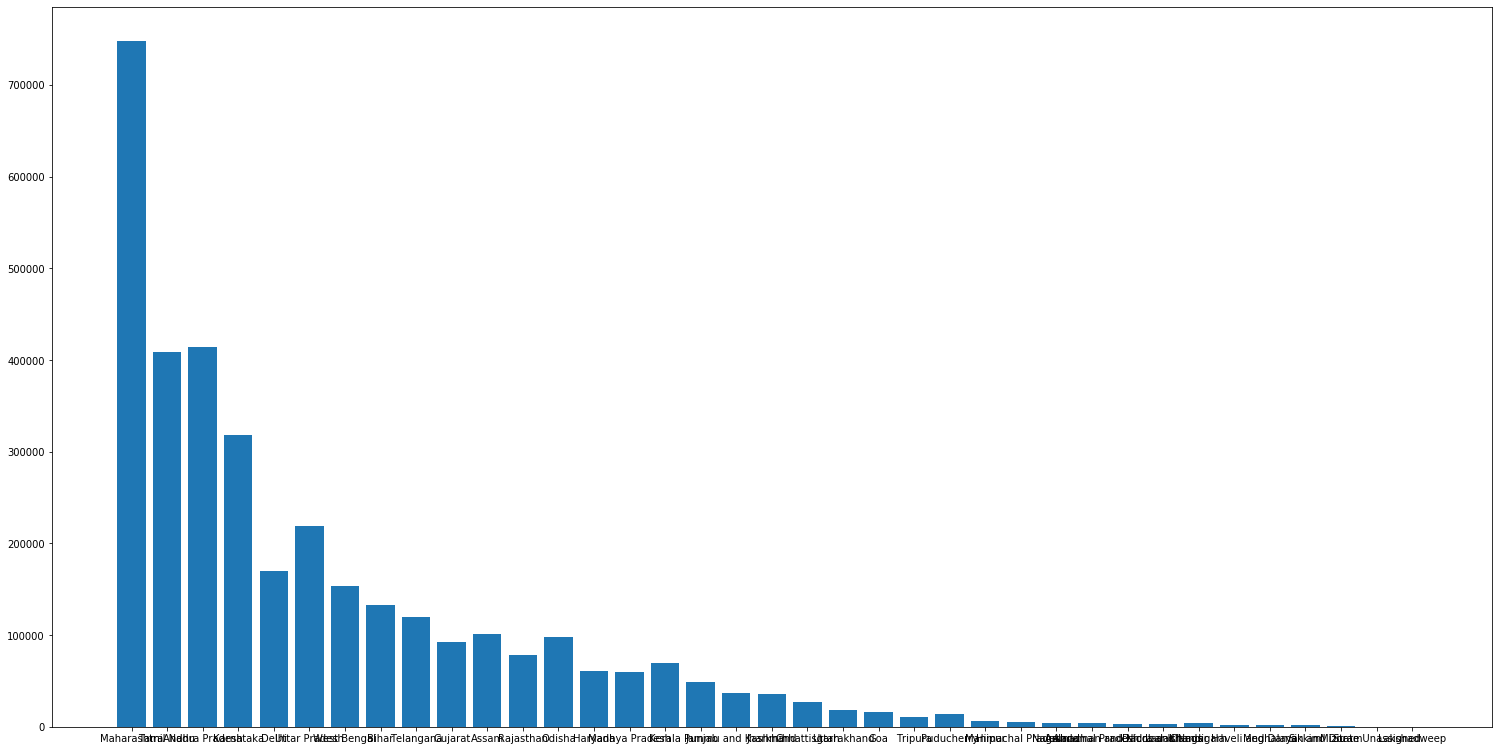

In [25]:
#for matplotlib
fig=plt.figure(figsize=(20,10))
axes=fig.add_axes([0,0,1,1])
axes.bar(x=statewise['State'],height = statewise['Confirmed'])
plt.show()

#plotly

fig=go.Figure()
fig.add_trace(go.Bar(x=statewise['State'],y= statewise['Confirmed']))

In [29]:
india_ordinates=pd.read_excel(r'D:\STATISTICS\datasets\covidindia org\Indian Coordinates.xlsx')
india_ordinates

,State,Latitude,Longitude
0,NaN,NaN,NaN
1,Andaman and Nicobar Islands,11.667026,92.735983
2,Andhra Pradesh,14.750429,78.570026
3,Arunachal Pradesh,27.100399,93.616601
4,Assam,26.749981,94.216667
5,Bihar,25.785414,87.479973
6,Chandigarh,30.719997,76.780006
7,Chhattisgarh,22.090420,82.159987
8,Dadra and Nagar Haveli and Daman and Diu,20.266578,73.016618
9,Delhi,28.669993,77.230004


In [30]:
india_ordinates=india_ordinates.iloc[1:]
india_ordinates

,State,Latitude,Longitude
1,Andaman and Nicobar Islands,11.667026,92.735983
2,Andhra Pradesh,14.750429,78.570026
3,Arunachal Pradesh,27.100399,93.616601
4,Assam,26.749981,94.216667
5,Bihar,25.785414,87.479973
6,Chandigarh,30.719997,76.780006
7,Chhattisgarh,22.090420,82.159987
8,Dadra and Nagar Haveli and Daman and Diu,20.266578,73.016618
9,Delhi,28.669993,77.230004
10,Gujarat,22.258700,71.192400


In [31]:
statewise_full=pd.merge(india_ordinates,statewise,on='State')
statewise_full

,State,Latitude,Longitude,Confirmed,Recovered,Deaths,Active
0,Andaman and Nicobar Islands,11.667026,92.735983,3050,2444,42,564
1,Andhra Pradesh,14.750429,78.570026,414164,312687,3796,97681
2,Arunachal Pradesh,27.100399,93.616601,3745,2709,7,1029
3,Assam,26.749981,94.216667,101368,81071,286,20008
4,Bihar,25.785414,87.479973,132935,115074,679,17181
5,Chandigarh,30.719997,76.780006,3985,2248,45,1692
6,Chhattisgarh,22.090420,82.159987,27233,15109,251,11873
7,Dadra and Nagar Haveli and Daman and Diu,20.266578,73.016618,2308,1989,2,290
8,Delhi,28.669993,77.230004,169412,151473,4389,13550
9,Gujarat,22.258700,71.192400,92601,74651,2976,14974


In [32]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(statewise_full['Latitude'],statewise_full['Longitude'],statewise_full['Confirmed'],statewise_full['State']):
    folium.CircleMarker([lat,long],radius=value*0.0001,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)

In [33]:
map

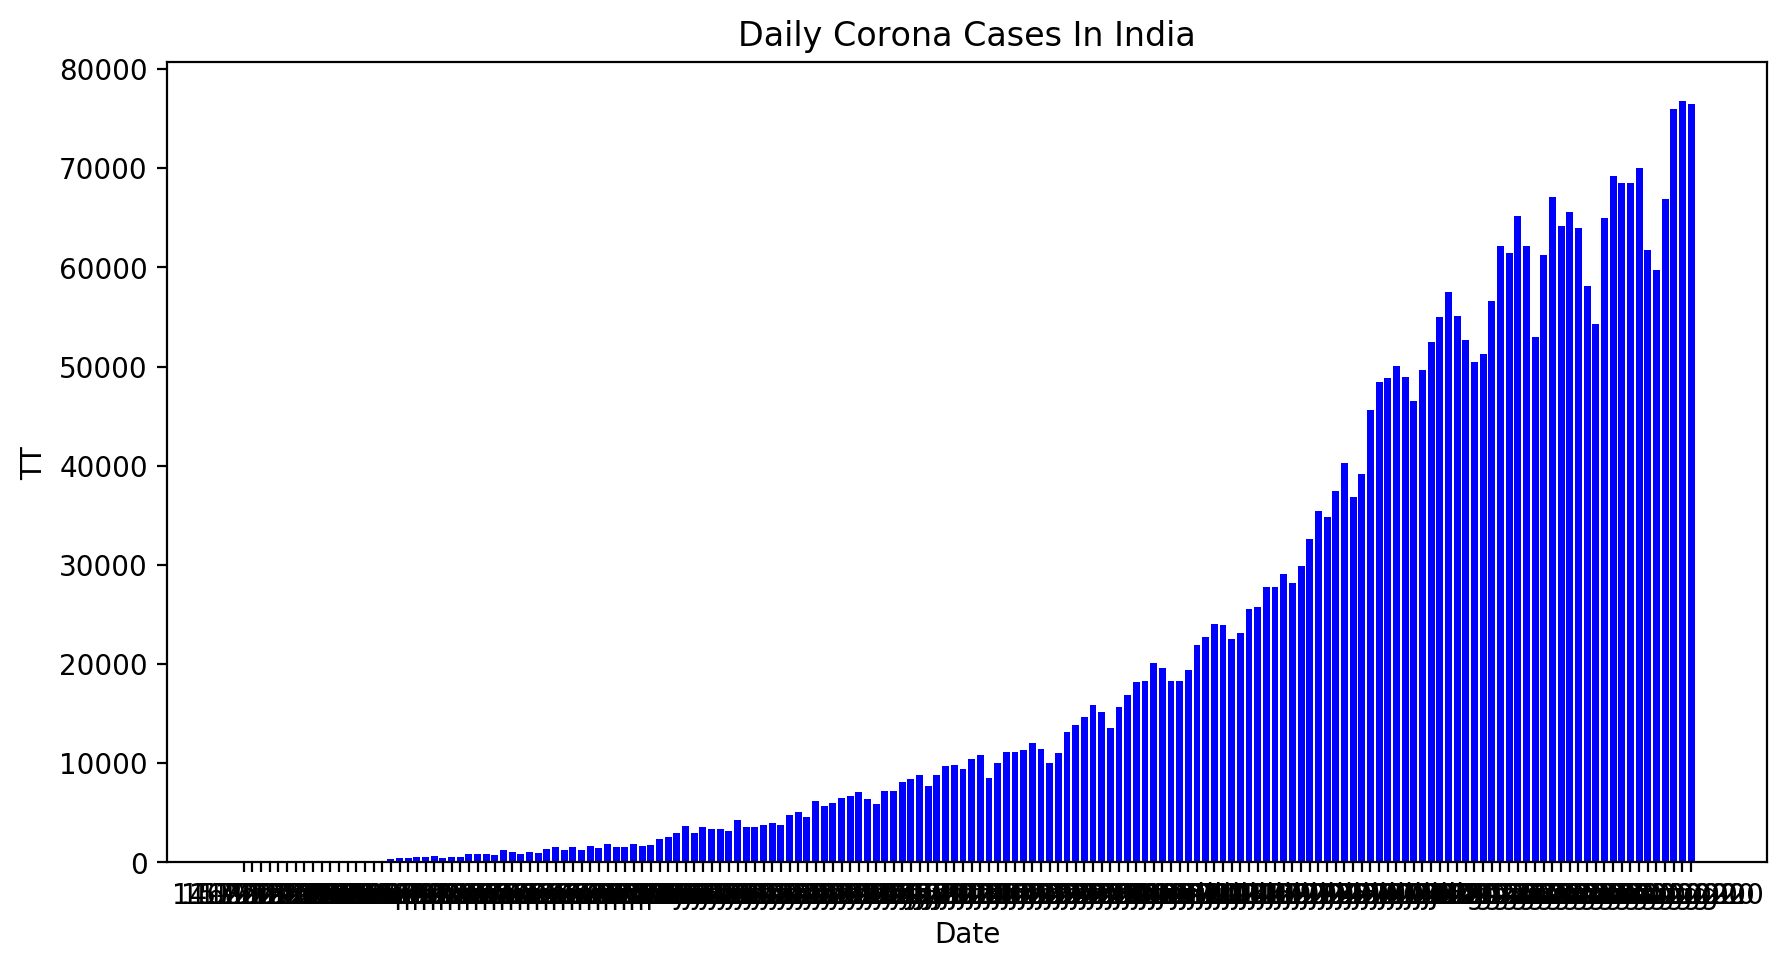

In [34]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(statewise_daily_confirmed['Date'],statewise_daily_confirmed['TT'],color='blue')
axes.set_xlabel('Date')
axes.set_ylabel('TT')
axes.set_title('Daily Corona Cases In India')



#using plotlyexpress
fig=px.bar(statewise_daily_confirmed,x='Date',y='TT',color='TT',title='Daily Cases In India')
fig.show()

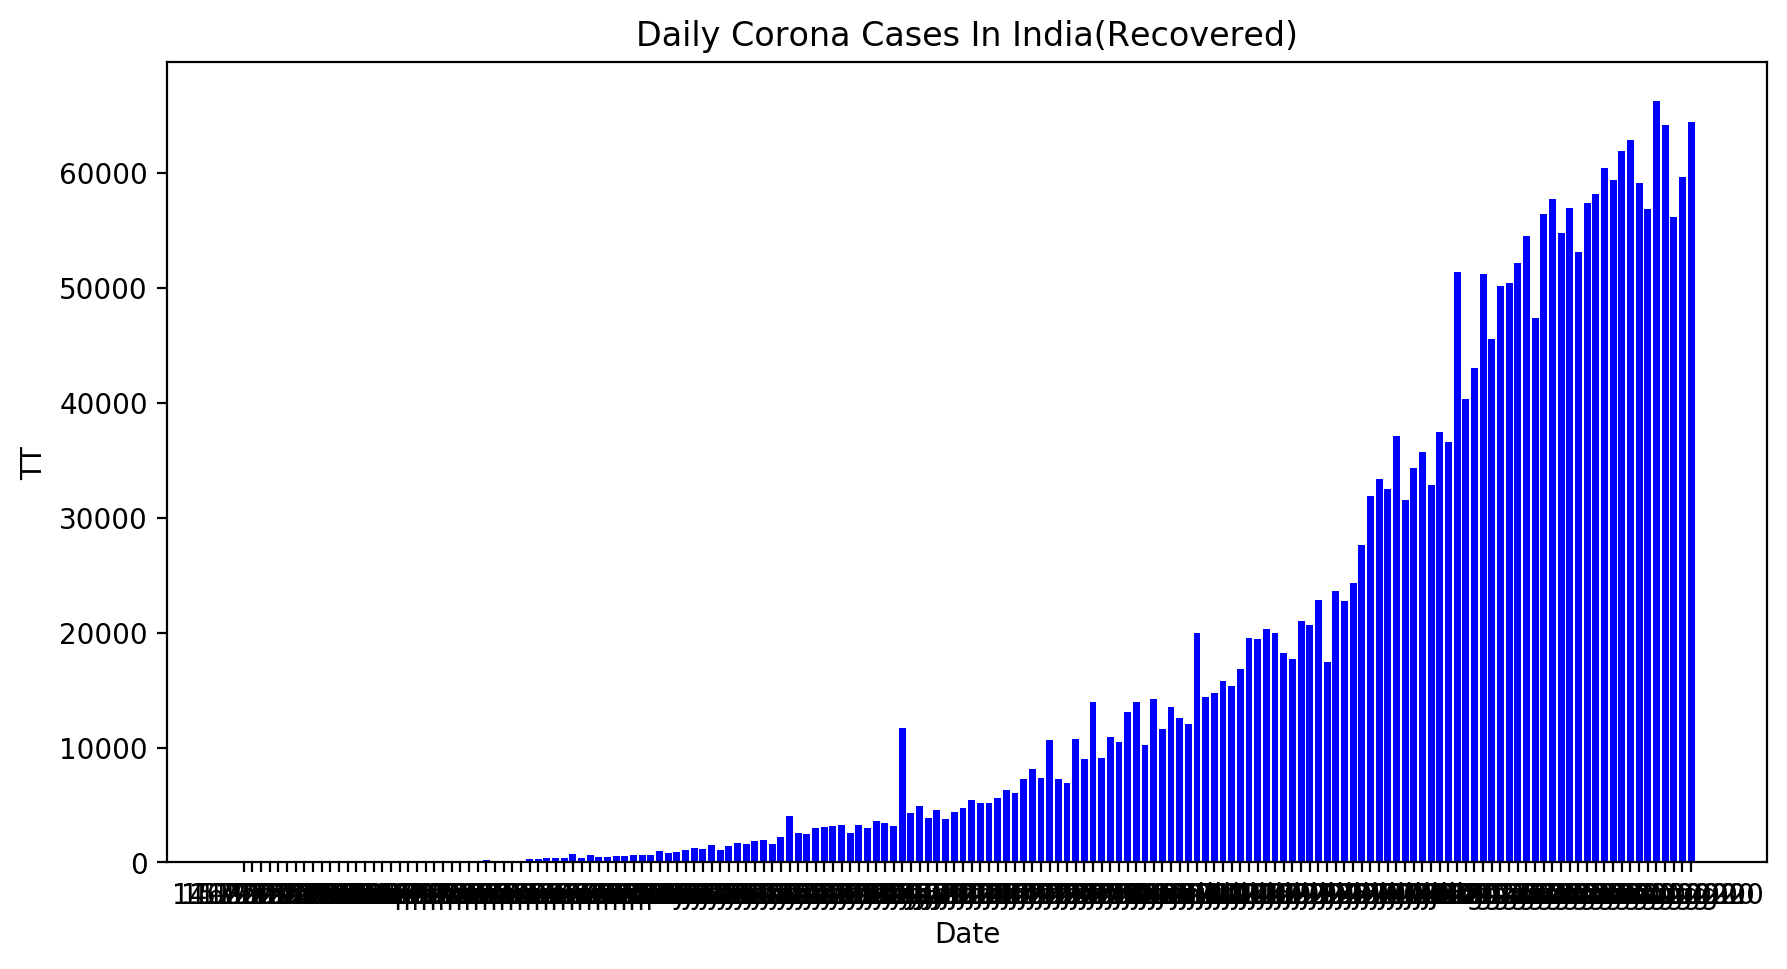

In [35]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(statewise_daily_recovered['Date'],statewise_daily_recovered['TT'],color='blue')
axes.set_xlabel('Date')
axes.set_ylabel('TT')
axes.set_title('Daily Corona Cases In India(Recovered)')



#using plotlyexpress
fig=px.bar(statewise_daily_recovered,x='Date',y='TT',color='TT',title='Daily Cases In India(Recovered)')
fig.show()

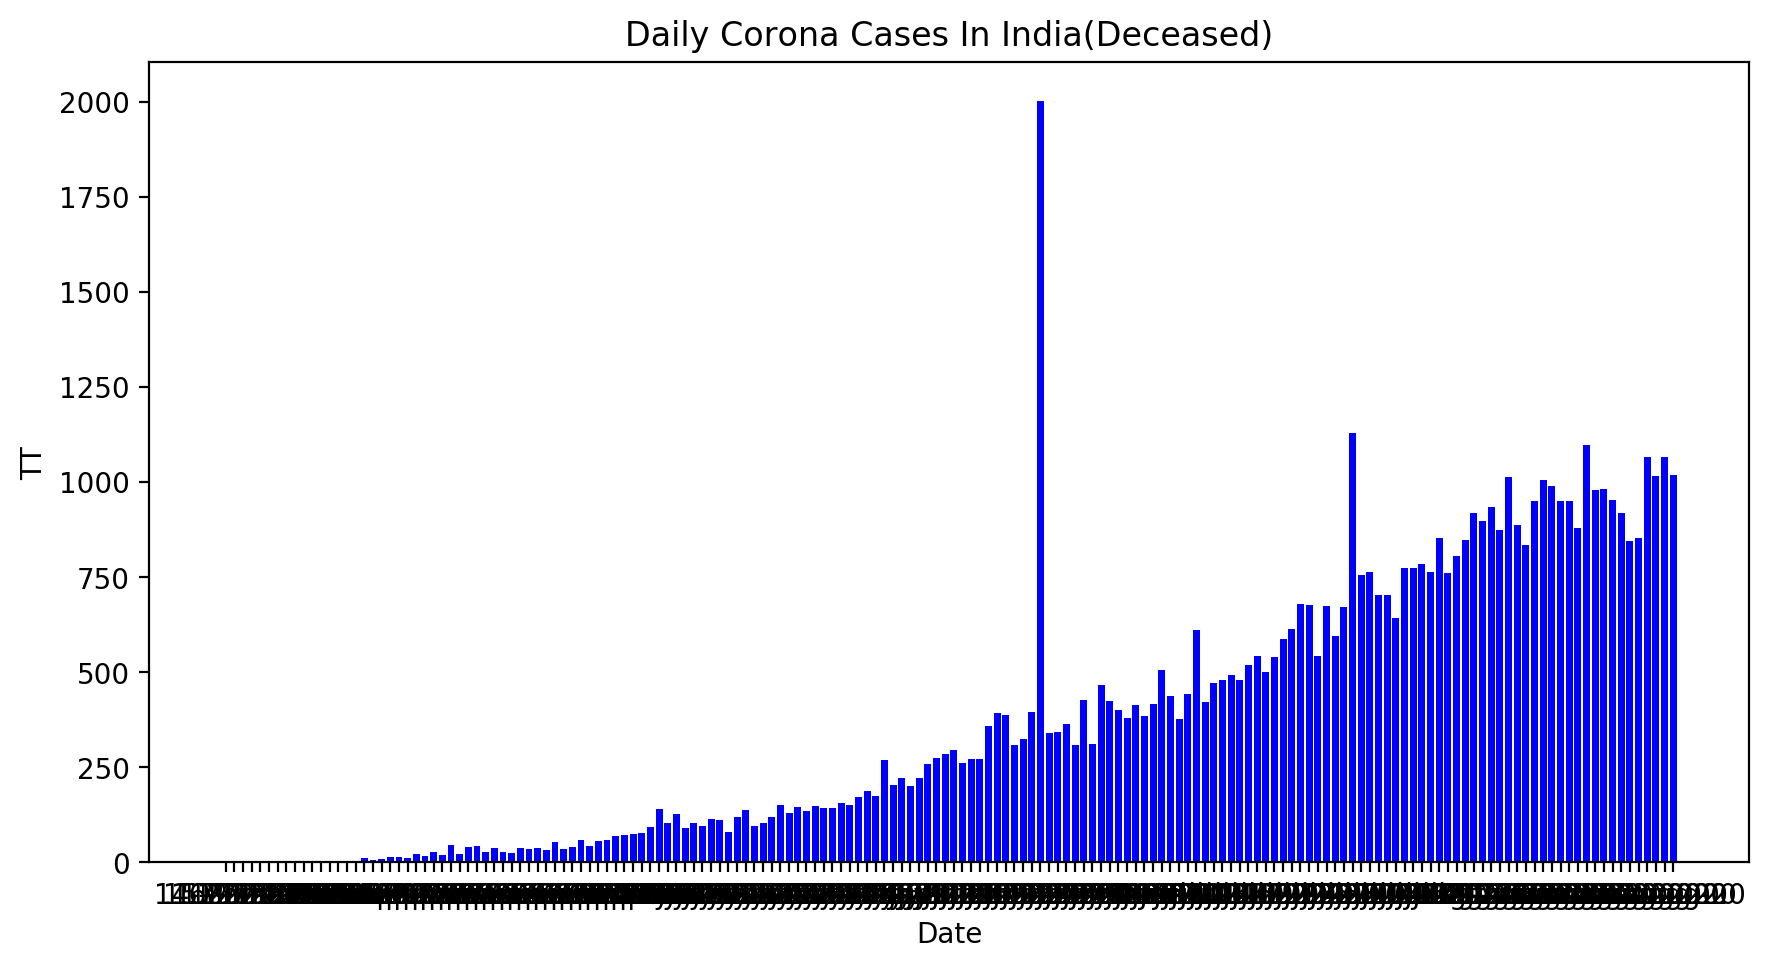

In [36]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(statewise_daily_deceased['Date'],statewise_daily_deceased['TT'],color='blue')
axes.set_xlabel('Date')
axes.set_ylabel('TT')
axes.set_title('Daily Corona Cases In India(Deceased)')



#using plotlyexpress
fig=px.bar(statewise_daily_deceased,x='Date',y='TT',color='TT',title='Daily Cases In India(Deceased)')
fig.show()

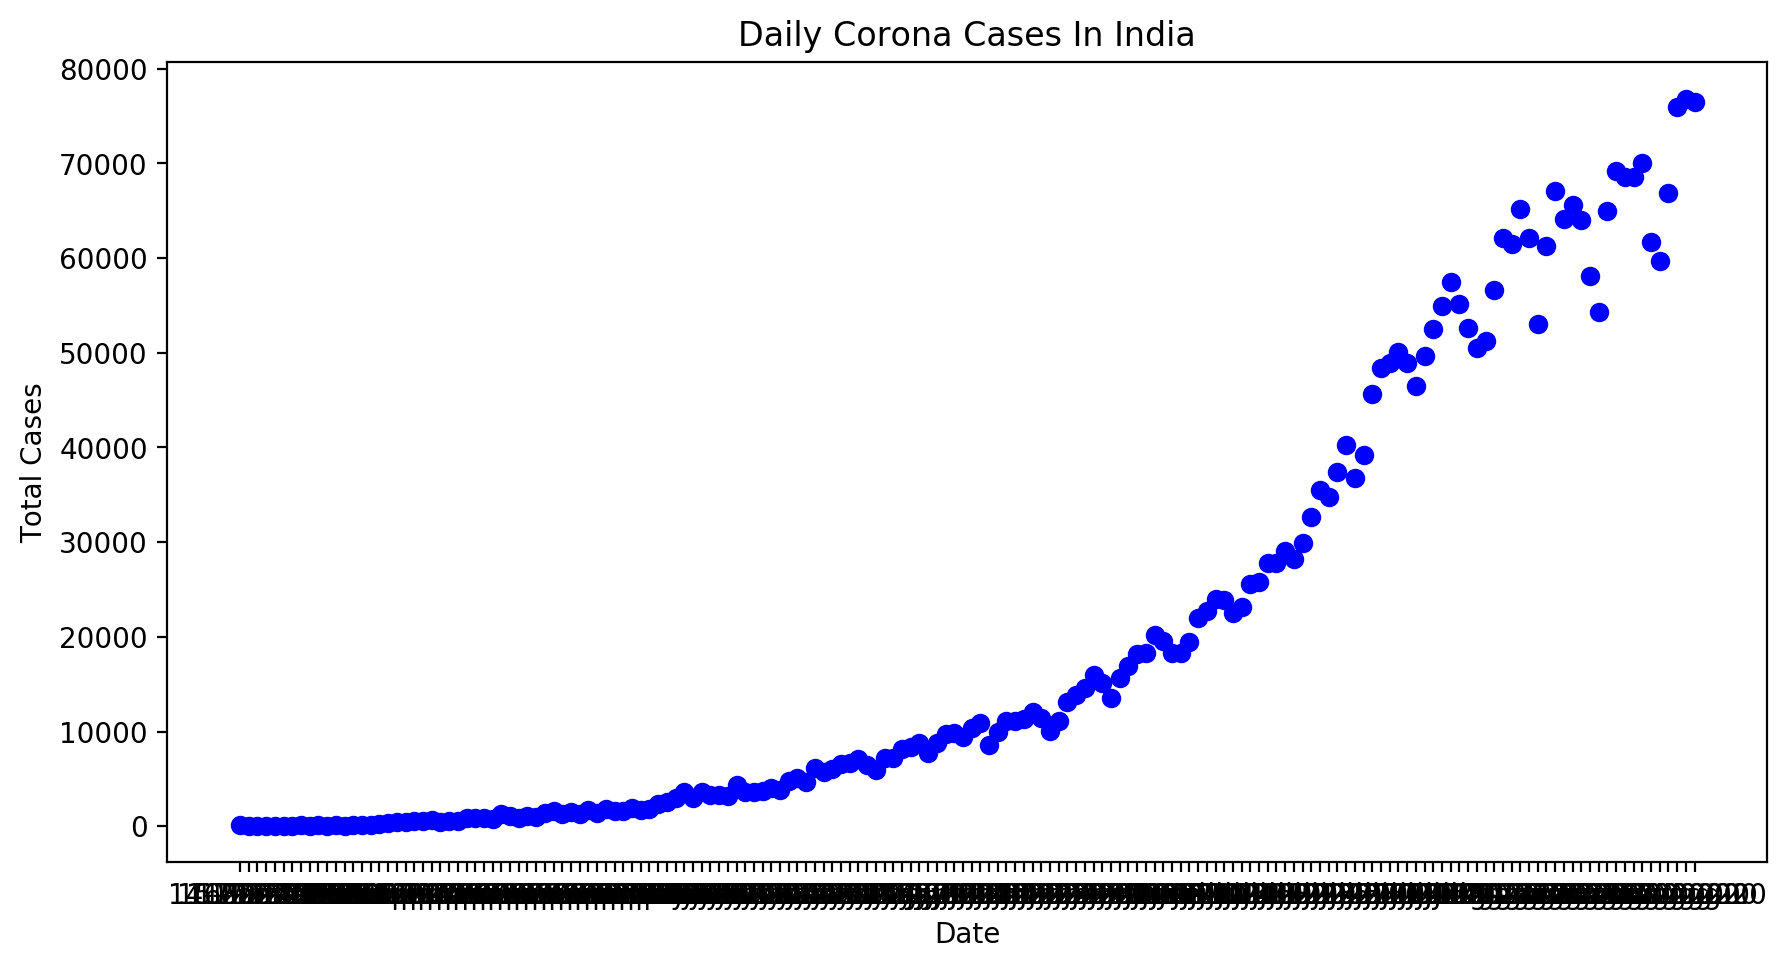

In [37]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(statewise_daily_confirmed['Date'],statewise_daily_confirmed['TT'],color='blue')
axes.set_xlabel('Date')
axes.set_ylabel('Total Cases')
axes.set_title('Daily Corona Cases In India')



#using plotlyexpress
fig=px.scatter(statewise_daily_confirmed,x='Date',y='TT',color='TT',title='Daily Cases In India')
fig.show()

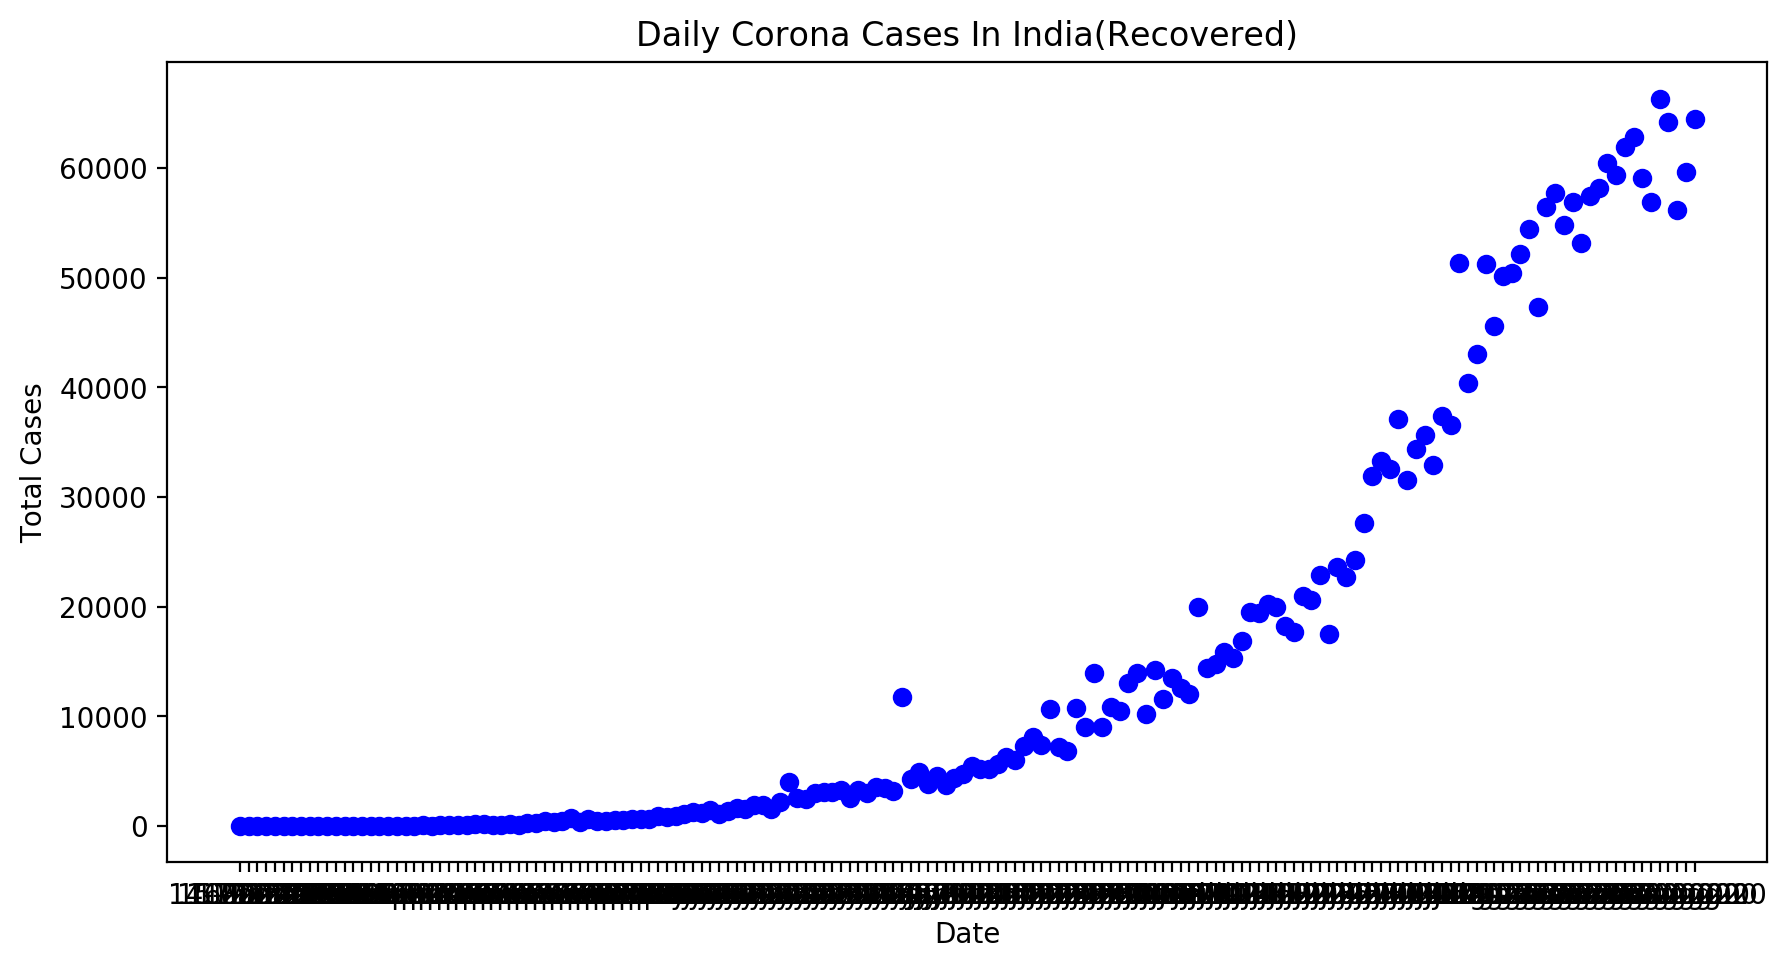

In [38]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(statewise_daily_recovered['Date'],statewise_daily_recovered['TT'],color='blue')
axes.set_xlabel('Date')
axes.set_ylabel('Total Cases')
axes.set_title('Daily Corona Cases In India(Recovered)')



#using plotlyexpress
fig=px.scatter(statewise_daily_recovered,x='Date',y='TT',color='TT',title='Daily Cases In India(Recovered)')
fig.show()

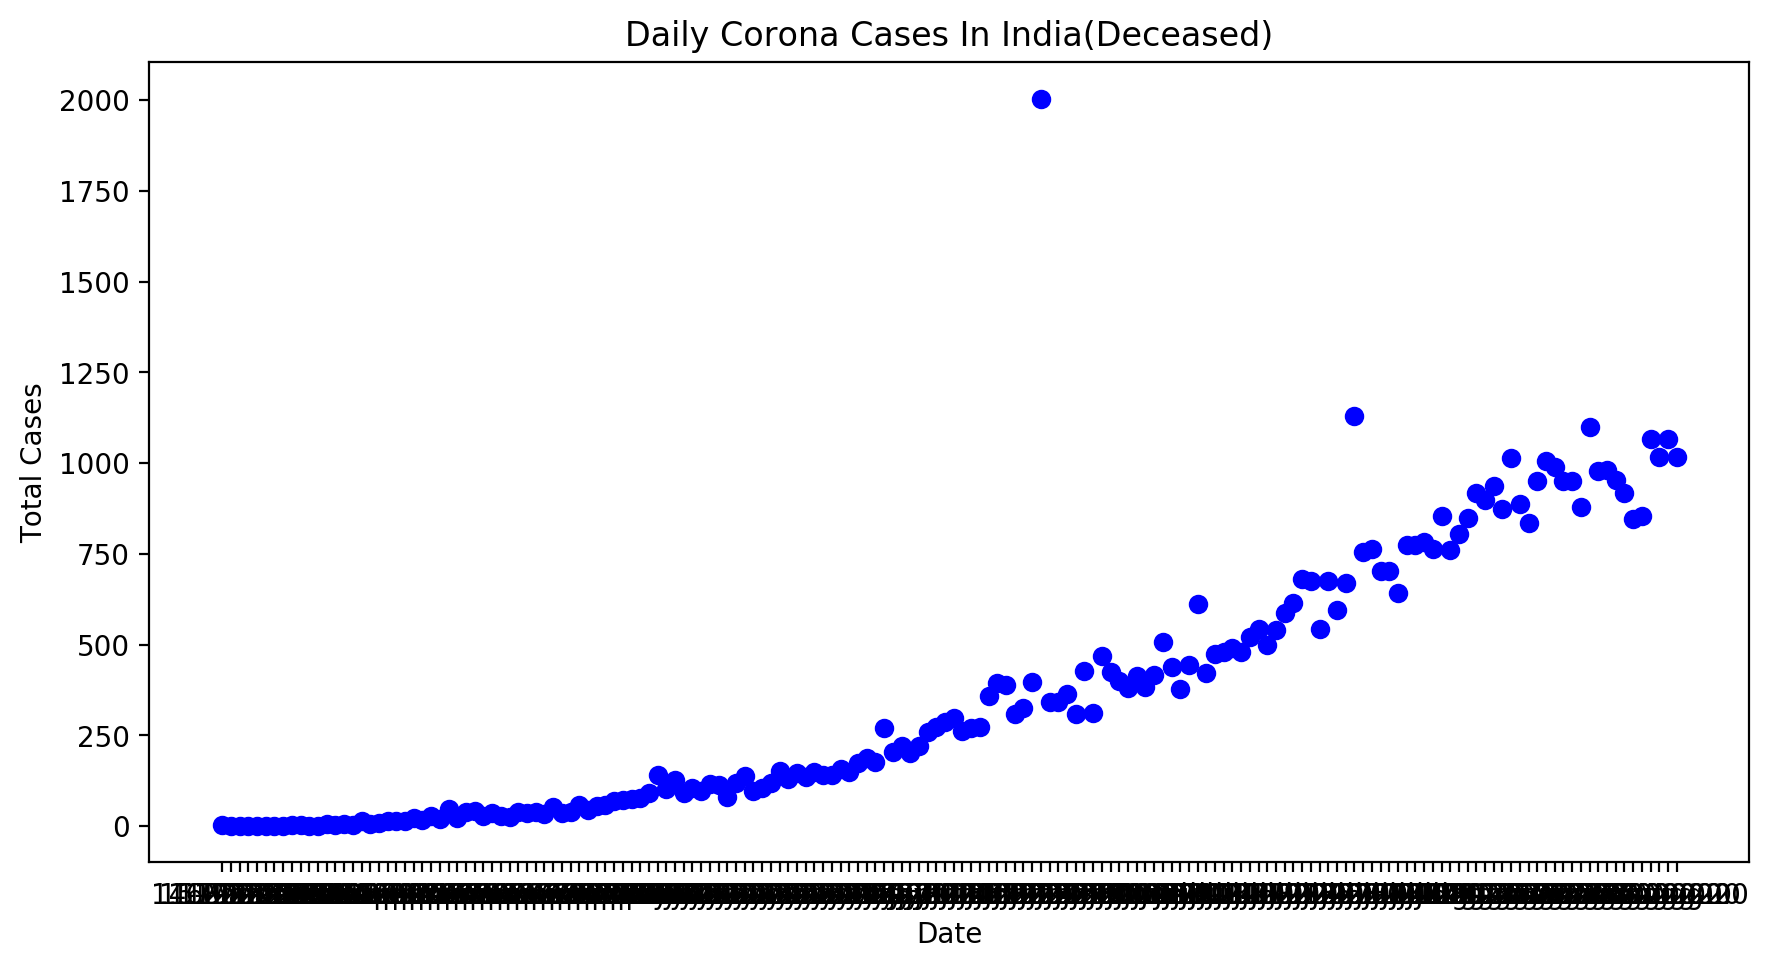

In [39]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(statewise_daily_deceased['Date'],statewise_daily_deceased['TT'],color='blue')
axes.set_xlabel('Date')
axes.set_ylabel('Total Cases')
axes.set_title('Daily Corona Cases In India(Deceased)')



#using plotlyexpress
fig=px.scatter(statewise_daily_deceased,x='Date',y='TT',color='TT',title='Daily Cases In India(Deceased)')
fig.show()

In [40]:
from plotly.subplots import make_subplots

In [41]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("confirmed","recovered","deceaed"))

fig.add_trace(go.Bar(x=statewise_daily_confirmed['Date'],y=statewise_daily_confirmed['TT'],
                    marker=dict(color=statewise_daily_confirmed['TT'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=statewise_daily_recovered['Date'],y=statewise_daily_recovered['TT'],
                    marker=dict(color=statewise_daily_recovered['TT'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=statewise_daily_deceased['Date'],y=statewise_daily_deceased['TT'],
                    marker=dict(color=statewise_daily_deceased['TT'],coloraxis="coloraxis")),2,1)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="INDIA")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [42]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=statewise_daily_confirmed['Date'],y=statewise_daily_confirmed['TT'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=statewise_daily_deceased['Date'],y=statewise_daily_deceased['TT'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=statewise_daily_recovered['Date'],y=statewise_daily_recovered['TT'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))

In [43]:
conda install libpython m2w64-toolchain -c msys2

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [46]:
from fbprophet import Prophet

In [48]:
statewise_daily_confirmed

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
6,16-Mar-20,Confirmed,15,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,17-Mar-20,Confirmed,11,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
12,18-Mar-20,Confirmed,37,0,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
15,19-Mar-20,Confirmed,27,0,2,0,0,0,1,1,...,0,2,0,1,3,0,3,1,0,0
18,20-Mar-20,Confirmed,58,0,0,0,0,0,4,0,...,1,8,0,0,3,0,4,0,1,0
21,21-Mar-20,Confirmed,78,0,2,0,0,0,0,0,...,10,7,0,3,2,0,4,0,2,0
24,22-Mar-20,Confirmed,67,0,1,0,0,2,1,0,...,8,4,0,3,6,0,2,0,3,0
27,23-Mar-20,Confirmed,102,0,1,0,0,1,1,0,...,2,4,0,3,6,0,2,1,0,0


In [73]:
ts_cnfirmed=statewise_daily_confirmed.iloc[:,0:3].reset_index()
ts_cnfirmed

,index,Date,Status,TT
0,0,14-Mar-20,Confirmed,81
1,3,15-Mar-20,Confirmed,27
2,6,16-Mar-20,Confirmed,15
3,9,17-Mar-20,Confirmed,11
4,12,18-Mar-20,Confirmed,37
5,15,19-Mar-20,Confirmed,27
6,18,20-Mar-20,Confirmed,58
7,21,21-Mar-20,Confirmed,78
8,24,22-Mar-20,Confirmed,67
9,27,23-Mar-20,Confirmed,102


In [74]:
ts_cnfirmed=ts_cnfirmed.drop(['Status','index'],axis=1)

In [75]:
ts_cnfirmed

,Date,TT
0,14-Mar-20,81
1,15-Mar-20,27
2,16-Mar-20,15
3,17-Mar-20,11
4,18-Mar-20,37
5,19-Mar-20,27
6,20-Mar-20,58
7,21-Mar-20,78
8,22-Mar-20,67
9,23-Mar-20,102


In [76]:
ts_cnfirmed.columns=['ds','y']

In [77]:
ts_cnfirmed['ds'] = pd.to_datetime(ts_cnfirmed['ds'])


In [83]:
m = Prophet(interval_width=0.95)
m.fit(ts_cnfirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
170,2020-08-31
171,2020-09-01
172,2020-09-02
173,2020-09-03
174,2020-09-04


In [84]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
170,2020-08-31,75201.785599,70732.180601,79694.413899
171,2020-09-01,77344.963206,72860.995932,81717.894512
172,2020-09-02,79702.315894,75195.100045,84491.204469
173,2020-09-03,80829.984889,76277.564564,85580.281038
174,2020-09-04,81561.124225,77109.256238,86300.249459


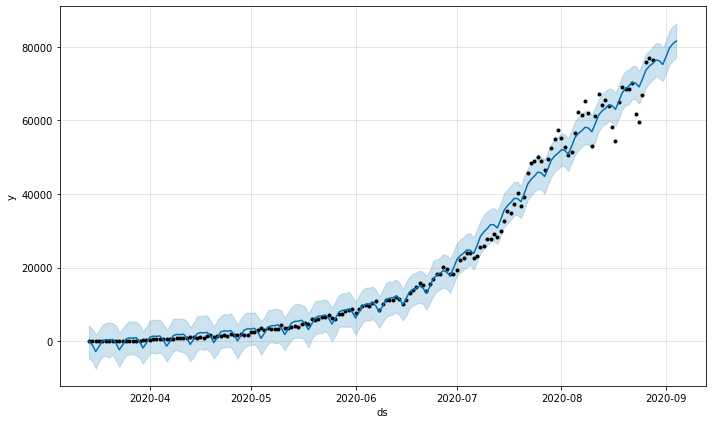

In [87]:
confirmed_forecast_plot = m.plot(forecast)

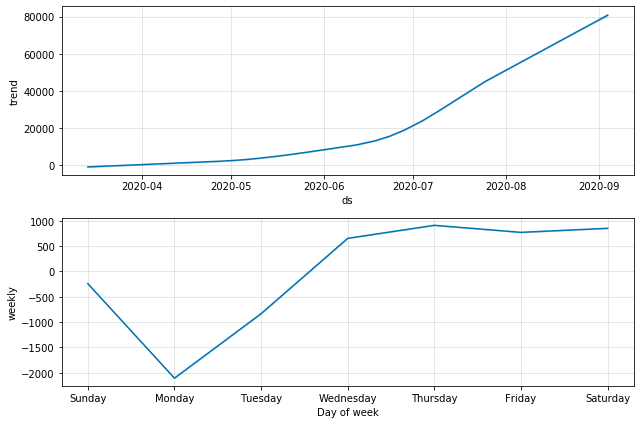

In [86]:
confirmed_forecast_plot =m.plot_components(forecast)